look at why we get weird blocking of the top results from our first semmeddb full prediction run

In [1]:
import pandas as pd
from scipy import spatial
import numpy

from tqdm import tqdm
import seaborn as sns

In [2]:
%matplotlib inline

## read data

In [3]:
res = pd.read_csv("rand_pairs_results_test.tsv", sep='\t')

In [4]:
res.shape

(200000, 7)

In [5]:
res.head()

,chem_uid,dise_uid,pscore,chem_id,chem_name,dise_id,dise_name
0,154665,93741,0.999879,C1098293,Ally,C0555047,Married
1,10999,60331,0.999375,C0032583,Polyproteins,C0275518,Acute infectious disease
2,61507,60877,0.996917,C0281606,recombinant viral vaccine,C0277525,Infectious gastroenteritis
3,10712,177075,0.994459,C0031881,Picloram,C1321554,Bacterial shell rot
4,13808,13002,0.992954,C0040577,Trace Elements,C0038340,Sting Injury


the blocking thing i was witnessing earlier was probably because i wasn't sorting the results by descending pscore

seems to go away now, which is good?

---

In [6]:
def get_simple_features(fname):
    """Get a dictionary of embeddings for all nodes.
    Faster than iterrowing the feature dataframe by 4x
    """

    res = dict()
    with open(fname, "r") as fin:
        nodes = int(fin.readline().split(" ")[0])

        for line in tqdm(fin, total=210389):
            vals = line.rstrip("\n").split(" ")

            uid = int(vals[0])
            res[uid] = list(map(float, vals[1:]))
            
    return res

In [7]:
sfeats = get_simple_features("data/embeddings/sem50walk128vec10window.txt")

100%|██████████| 210389/210389 [00:08<00:00, 25847.59it/s]


In [8]:
def convolv(chemuid, diseuid):
    """Get convolved features."""
    return [
        sfeats[chemuid][i] * sfeats[diseuid][i]
        for i in range(vecsize)
    ]

---

In [9]:
def similarity(u, v):
    return 1 - spatial.distance.cosine(u, v)

In [10]:
res.head()

,chem_uid,dise_uid,pscore,chem_id,chem_name,dise_id,dise_name
0,154665,93741,0.999879,C1098293,Ally,C0555047,Married
1,10999,60331,0.999375,C0032583,Polyproteins,C0275518,Acute infectious disease
2,61507,60877,0.996917,C0281606,recombinant viral vaccine,C0277525,Infectious gastroenteritis
3,10712,177075,0.994459,C0031881,Picloram,C1321554,Bacterial shell rot
4,13808,13002,0.992954,C0040577,Trace Elements,C0038340,Sting Injury


In [11]:
tmp = list()
vecsize = 128

for cuid, duid in tqdm(zip(res["chem_uid"], res["dise_uid"]), total=len(res)):
    simval = similarity(sfeats[cuid], sfeats[duid])
    
    tmp.append(simval)

100%|██████████| 200000/200000 [00:10<00:00, 18220.83it/s]


In [12]:
res = res.assign(pairsim = tmp)

In [13]:
res.head(40)

,chem_uid,dise_uid,pscore,chem_id,chem_name,dise_id,dise_name,pairsim
0,154665,93741,0.999879,C1098293,Ally,C0555047,Married,0.473784
1,10999,60331,0.999375,C0032583,Polyproteins,C0275518,Acute infectious disease,0.357500
2,61507,60877,0.996917,C0281606,recombinant viral vaccine,C0277525,Infectious gastroenteritis,0.432502
3,10712,177075,0.994459,C0031881,Picloram,C1321554,Bacterial shell rot,0.533377
4,13808,13002,0.992954,C0040577,Trace Elements,C0038340,Sting Injury,0.191939
5,8041,73965,0.992777,C0023789,Lipofuscin,C0333468,Acidophilic body,0.486907
6,79597,178184,0.985968,C0383429,alemtuzumab,C1332051,AIDS-Related Non-Hodgkin's Lymphoma,0.398581
7,2251,4559,0.984524,C0006669,Calcitonin Gene-Related Peptide,C0013609,"[D]Edema, localized",0.207382
8,176263,51657,0.981182,C1311934,N-(3-methoxyphenyl)-4-chlorocinnamanilide,C0234243,Central pain,0.299327
9,8617,3818,0.980861,C0025556,"Metals, Rare Earth",C0011175,Dehydration,0.212213


## does similarity of the chemical and disease affect probability of being ranked highly?

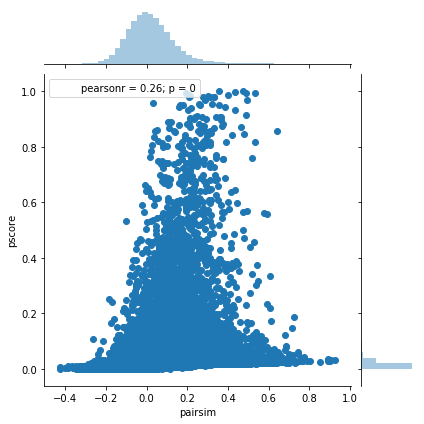

In [14]:
sns.jointplot(data=res, x="pairsim", y="pscore")

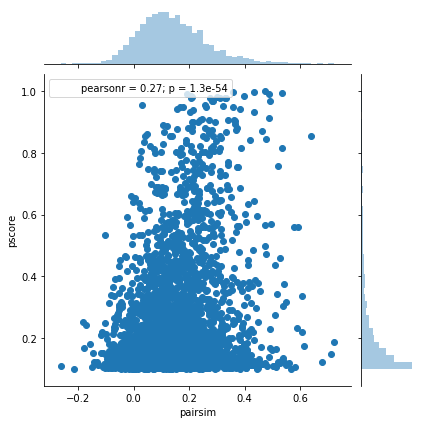

In [15]:
sns.jointplot(
    data=res.query("pscore > 0.1"), x="pairsim", y="pscore",
)

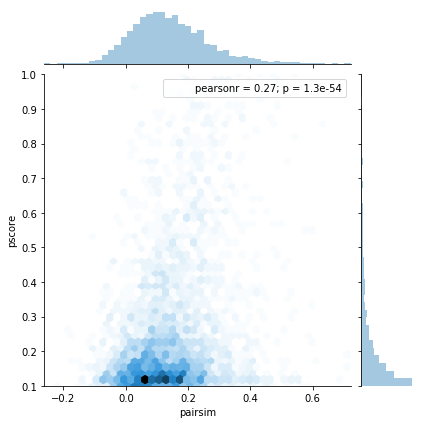

In [16]:
sns.jointplot(
    data=res.query("pscore > 0.1"), x="pairsim", y="pscore",
    kind="hex"
)

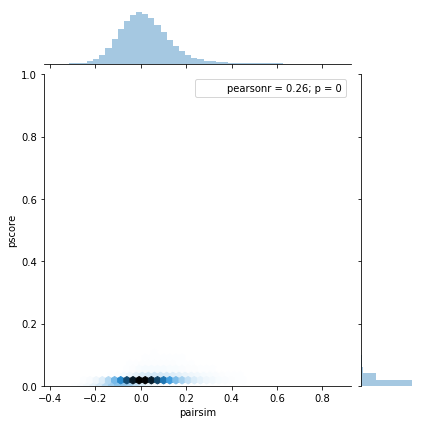

In [17]:
sns.jointplot(data=res, x="pairsim", y="pscore", kind="hex")

## similarity to the top result and probability of being ranked highly?

In [18]:
best = res.query("pscore > 0.7")

vecsize = 128

tmp = list()

# top result
topfeats = convolv(105788, 51643)

for cuid, duid in zip(best["chem_uid"], best["dise_uid"]):
    fvec = convolv(cuid, duid)
    
    tmp.append([cuid, duid, similarity(topfeats, fvec)])
    
tmp = pd.DataFrame(tmp, columns=["chem_uid", "dise_uid", "similarity"])

---

In [19]:
fin = best.merge(tmp, how="inner", on=["chem_uid", "dise_uid"])

In [20]:
fin.head()

,chem_uid,dise_uid,pscore,chem_id,chem_name,dise_id,dise_name,pairsim,similarity
0,154665,93741,0.999879,C1098293,Ally,C0555047,Married,0.473784,0.055904
1,10999,60331,0.999375,C0032583,Polyproteins,C0275518,Acute infectious disease,0.357500,0.082571
2,61507,60877,0.996917,C0281606,recombinant viral vaccine,C0277525,Infectious gastroenteritis,0.432502,0.146538
3,10712,177075,0.994459,C0031881,Picloram,C1321554,Bacterial shell rot,0.533377,0.247576
4,13808,13002,0.992954,C0040577,Trace Elements,C0038340,Sting Injury,0.191939,0.090664


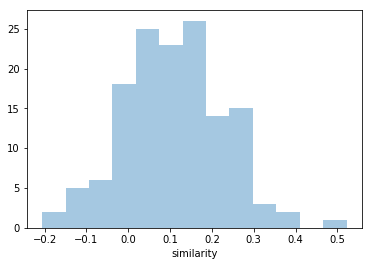

In [21]:
sns.distplot(fin["similarity"], kde=False)

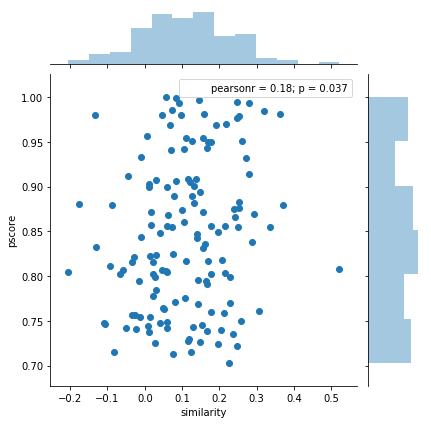

In [22]:
sns.jointplot(data=fin, x="similarity", y="pscore")

for the top results i'm not seeing any sort of obvious correlation between the top result and the ranking

maybe it's time to look at a more random sampling like andrew said